In [1]:
from os import path

import torch
print(torch.__version__)
print(torch.cuda.is_available())
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
from path import Path
import torch.utils.data as data

from torch import nn
import numpy as np
import pandas as pd
import tqdm

import os
import os
from sklearn.model_selection import train_test_split
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F


all_letters="ACTG"

1.0.1.post2
True


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
df=pd.DataFrame()
azz={}

In [3]:
def plot_roc(y_test,y_score,n_classes):
    #y_test=N_elements
    #y_score=N_elements X N_classes
#     fpr = dict()
#     tpr = dict()
    y_test = label_binarize(y_test, classes=[0, 1, 2])
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    plt.figure()
    lw = 2
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    azz['fpr']=fpr["macro"]
    azz['tpr']=tpr["macro"]

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    print(fpr['macro'].shape,tpr['macro'].shape,roc_auc["macro"])


    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('BiLSTM  FOR  ILD  DATASET')
    plt.legend(loc="lower right")
    plt.show()



In [4]:
def letterToIndex(letter):
    return all_letters.find(letter)
def letterToTensor(letter):
  tensor=torch.zeros(1,4)
  tensor[0][letterToIndex(letter)] = 1
  return tensor
def lineToTensor(line):
  tensor=torch.zeros(len(line),1,4)
  for li,letters in enumerate(line):
    tensor[li][0][letterToIndex(letters)]=1
  return(tensor)

In [5]:
# lstm = nn.LSTM(input_size=4,hidden_size=100)  
# lstm=lstm.to(device)
# fc=nn.Linear(100,3).to(device)
# learning_rate = 0.05
# criterion = nn.NLLLoss().to(device)

In [6]:
File_object = open('Labels_ILD.txt',"r")
label_txt=File_object.readlines()

 


In [7]:
 

genename=pd.read_csv('preprocessed_ILD.csv')
u=genename['gen_name']

mapz=pd.read_csv('sequence.csv')


In [10]:
key=mapz['gene'].tolist()
sequence=mapz['sequence'].tolist()

dictionary = dict(zip(key, sequence))


In [11]:
def gene_preprocessing(text):
  g=""
  u=0
  for i in text:
    if  ord(i)<=90 and ord(i)>=65:
      g=g+i.lower()
    else:
      g=g+i
  return(g)
len(genename['gen_name'])
 

18144

In [12]:
loss_epoch=0
a=0
b=0
c=0
d=0
mint=99999999999999
maxt=-1
total_gene=[]
total_label=[]
for V in tqdm.tqdm(range(len(genename['gen_name']))):
    j=genename['gen_name'][V]
    GN=gene_preprocessing(j)
    #print(GN)
    lab=int(label_txt[V].replace('\n',''))
    #print(lab)
    if GN not in dictionary.keys():

        continue
    mint=min (len(dictionary[GN][:50]),mint)
    maxt=max (len(dictionary[GN][:50]),maxt)
#     print(GN)
    lin2TenGene=np.array(lineToTensor(dictionary[GN][:70]))
    if(lab==0):
#         if a>1000:
#             continue
        a=a+1
    elif lab==1:
#         if b>1000:
#             continue
        b=b+1
    elif(lab==2):
#         if c>1000:
#             continue
        c=c+3
        total_gene.append(lin2TenGene)
        total_label.append(lab)
        total_gene.append(lin2TenGene)
        total_label.append(lab)
    else:
        d=d+1
    total_gene.append(lin2TenGene)
    cc=lineToTensor(dictionary[GN][:70])
#     print(cc)
#     print(cc[:,0,:].shape)
    total_label.append(lab)
    
    
print(a,b,c,d)
print(mint,maxt)


100%|██████████| 18144/18144 [00:22<00:00, 812.44it/s] 

6477 5042 6591 0
50 50


In [13]:
for V in tqdm.tqdm(range(len(genename['gen_name']))):
    j=genename['gen_name'][V]
    GN=gene_preprocessing(j)
    #print(GN)
    lab=int(label_txt[V].replace('\n',''))
    #print(lab)
    if GN not in dictionary.keys():

        continue
    mint=min (len(dictionary[GN][:50]),mint)
    maxt=max (len(dictionary[GN][:50]),maxt)
#     print(GN)
    lin2TenGene=np.array(lineToTensor(dictionary[GN][:70]))
    if(lab==0):
        continue
#         if a>100:
#             continue
        a=a+1
    elif lab==1:
        if b>6477:
            continue
        b=b+1
    elif(lab==2):
        continue
#         if c>100:
#             continue
        
        c=c+3
        total_gene.append(lin2TenGene)
        total_label.append(lab)
        total_gene.append(lin2TenGene)
        total_label.append(lab)
    else:
        d=d+1
    total_gene.append(lin2TenGene)
    cc=lineToTensor(dictionary[GN][:70])
#     print(cc)
#     print(cc[:,0,:].shape)
    total_label.append(lab)
    
    
print(a,b,c,d)
print(mint,maxt)

100%|██████████| 18144/18144 [00:12<00:00, 1441.04it/s]

6477 6478 6591 0
50 50


In [14]:
print(len(total_gene))
print(len(total_label))

19546
19546


In [15]:
df = pd.DataFrame({'gen_name':total_gene,'gen_label':total_label})
df.to_csv('ILD_LSTM_traintest.csv')
print(len(df))        
df['gen_name'][0].shape

19546


(70, 1, 4)

In [16]:
class SequenceFolder(data.Dataset):
    def __init__(self,root):
        self.dataset=root
        
    
    def __len__(self):
#         print(len(self.dataset))
        return len(self.dataset)       

    def __getitem__(self, index):
         return (np.array(total_gene[index]) ,np.array(total_label[index]))
#         print(self.dataset['gen_name'][index])          
#         try:
           
#         except :
            
total_set=SequenceFolder(df)  
print(len(total_set))
u=0
for x in total_set:
    print(u)
#     print(x)
    u=u+1
    print("yes")
    

19546
0
yes
1
yes
2
yes
3
yes
4
yes
5
yes
6
yes
7
yes
8
yes
9
yes
10
yes
11
yes
12
yes
13
yes
14
yes
15
yes
16
yes
17
yes
18
yes
19
yes
20
yes
21
yes
22
yes
23
yes
24
yes
25
yes
26
yes
27
yes
28
yes
29
yes
30
yes
31
yes
32
yes
33
yes
34
yes
35
yes
36
yes
37
yes
38
yes
39
yes
40
yes
41
yes
42
yes
43
yes
44
yes
45
yes
46
yes
47
yes
48
yes
49
yes
50
yes
51
yes
52
yes
53
yes
54
yes
55
yes
56
yes
57
yes
58
yes
59
yes
60
yes
61
yes
62
yes
63
yes
64
yes
65
yes
66
yes
67
yes
68
yes
69
yes
70
yes
71
yes
72
yes
73
yes
74
yes
75
yes
76
yes
77
yes
78
yes
79
yes
80
yes
81
yes
82
yes
83
yes
84
yes
85
yes
86
yes
87
yes
88
yes
89
yes
90
yes
91
yes
92
yes
93
yes
94
yes
95
yes
96
yes
97
yes
98
yes
99
yes
100
yes
101
yes
102
yes
103
yes
104
yes
105
yes
106
yes
107
yes
108
yes
109
yes
110
yes
111
yes
112
yes
113
yes
114
yes
115
yes
116
yes
117
yes
118
yes
119
yes
120
yes
121
yes
122
yes
123
yes
124
yes
125
yes
126
yes
127
yes
128
yes
129
yes
130
yes
131
yes
132
yes
133
yes
134
yes
135
yes
136
yes
137
yes


1106
yes
1107
yes
1108
yes
1109
yes
1110
yes
1111
yes
1112
yes
1113
yes
1114
yes
1115
yes
1116
yes
1117
yes
1118
yes
1119
yes
1120
yes
1121
yes
1122
yes
1123
yes
1124
yes
1125
yes
1126
yes
1127
yes
1128
yes
1129
yes
1130
yes
1131
yes
1132
yes
1133
yes
1134
yes
1135
yes
1136
yes
1137
yes
1138
yes
1139
yes
1140
yes
1141
yes
1142
yes
1143
yes
1144
yes
1145
yes
1146
yes
1147
yes
1148
yes
1149
yes
1150
yes
1151
yes
1152
yes
1153
yes
1154
yes
1155
yes
1156
yes
1157
yes
1158
yes
1159
yes
1160
yes
1161
yes
1162
yes
1163
yes
1164
yes
1165
yes
1166
yes
1167
yes
1168
yes
1169
yes
1170
yes
1171
yes
1172
yes
1173
yes
1174
yes
1175
yes
1176
yes
1177
yes
1178
yes
1179
yes
1180
yes
1181
yes
1182
yes
1183
yes
1184
yes
1185
yes
1186
yes
1187
yes
1188
yes
1189
yes
1190
yes
1191
yes
1192
yes
1193
yes
1194
yes
1195
yes
1196
yes
1197
yes
1198
yes
1199
yes
1200
yes
1201
yes
1202
yes
1203
yes
1204
yes
1205
yes
1206
yes
1207
yes
1208
yes
1209
yes
1210
yes
1211
yes
1212
yes
1213
yes
1214
yes
1215
yes
1216
yes
1

2243
yes
2244
yes
2245
yes
2246
yes
2247
yes
2248
yes
2249
yes
2250
yes
2251
yes
2252
yes
2253
yes
2254
yes
2255
yes
2256
yes
2257
yes
2258
yes
2259
yes
2260
yes
2261
yes
2262
yes
2263
yes
2264
yes
2265
yes
2266
yes
2267
yes
2268
yes
2269
yes
2270
yes
2271
yes
2272
yes
2273
yes
2274
yes
2275
yes
2276
yes
2277
yes
2278
yes
2279
yes
2280
yes
2281
yes
2282
yes
2283
yes
2284
yes
2285
yes
2286
yes
2287
yes
2288
yes
2289
yes
2290
yes
2291
yes
2292
yes
2293
yes
2294
yes
2295
yes
2296
yes
2297
yes
2298
yes
2299
yes
2300
yes
2301
yes
2302
yes
2303
yes
2304
yes
2305
yes
2306
yes
2307
yes
2308
yes
2309
yes
2310
yes
2311
yes
2312
yes
2313
yes
2314
yes
2315
yes
2316
yes
2317
yes
2318
yes
2319
yes
2320
yes
2321
yes
2322
yes
2323
yes
2324
yes
2325
yes
2326
yes
2327
yes
2328
yes
2329
yes
2330
yes
2331
yes
2332
yes
2333
yes
2334
yes
2335
yes
2336
yes
2337
yes
2338
yes
2339
yes
2340
yes
2341
yes
2342
yes
2343
yes
2344
yes
2345
yes
2346
yes
2347
yes
2348
yes
2349
yes
2350
yes
2351
yes
2352
yes
2353
yes
2

3438
yes
3439
yes
3440
yes
3441
yes
3442
yes
3443
yes
3444
yes
3445
yes
3446
yes
3447
yes
3448
yes
3449
yes
3450
yes
3451
yes
3452
yes
3453
yes
3454
yes
3455
yes
3456
yes
3457
yes
3458
yes
3459
yes
3460
yes
3461
yes
3462
yes
3463
yes
3464
yes
3465
yes
3466
yes
3467
yes
3468
yes
3469
yes
3470
yes
3471
yes
3472
yes
3473
yes
3474
yes
3475
yes
3476
yes
3477
yes
3478
yes
3479
yes
3480
yes
3481
yes
3482
yes
3483
yes
3484
yes
3485
yes
3486
yes
3487
yes
3488
yes
3489
yes
3490
yes
3491
yes
3492
yes
3493
yes
3494
yes
3495
yes
3496
yes
3497
yes
3498
yes
3499
yes
3500
yes
3501
yes
3502
yes
3503
yes
3504
yes
3505
yes
3506
yes
3507
yes
3508
yes
3509
yes
3510
yes
3511
yes
3512
yes
3513
yes
3514
yes
3515
yes
3516
yes
3517
yes
3518
yes
3519
yes
3520
yes
3521
yes
3522
yes
3523
yes
3524
yes
3525
yes
3526
yes
3527
yes
3528
yes
3529
yes
3530
yes
3531
yes
3532
yes
3533
yes
3534
yes
3535
yes
3536
yes
3537
yes
3538
yes
3539
yes
3540
yes
3541
yes
3542
yes
3543
yes
3544
yes
3545
yes
3546
yes
3547
yes
3548
yes
3

4811
yes
4812
yes
4813
yes
4814
yes
4815
yes
4816
yes
4817
yes
4818
yes
4819
yes
4820
yes
4821
yes
4822
yes
4823
yes
4824
yes
4825
yes
4826
yes
4827
yes
4828
yes
4829
yes
4830
yes
4831
yes
4832
yes
4833
yes
4834
yes
4835
yes
4836
yes
4837
yes
4838
yes
4839
yes
4840
yes
4841
yes
4842
yes
4843
yes
4844
yes
4845
yes
4846
yes
4847
yes
4848
yes
4849
yes
4850
yes
4851
yes
4852
yes
4853
yes
4854
yes
4855
yes
4856
yes
4857
yes
4858
yes
4859
yes
4860
yes
4861
yes
4862
yes
4863
yes
4864
yes
4865
yes
4866
yes
4867
yes
4868
yes
4869
yes
4870
yes
4871
yes
4872
yes
4873
yes
4874
yes
4875
yes
4876
yes
4877
yes
4878
yes
4879
yes
4880
yes
4881
yes
4882
yes
4883
yes
4884
yes
4885
yes
4886
yes
4887
yes
4888
yes
4889
yes
4890
yes
4891
yes
4892
yes
4893
yes
4894
yes
4895
yes
4896
yes
4897
yes
4898
yes
4899
yes
4900
yes
4901
yes
4902
yes
4903
yes
4904
yes
4905
yes
4906
yes
4907
yes
4908
yes
4909
yes
4910
yes
4911
yes
4912
yes
4913
yes
4914
yes
4915
yes
4916
yes
4917
yes
4918
yes
4919
yes
4920
yes
4921
yes
4

5972
yes
5973
yes
5974
yes
5975
yes
5976
yes
5977
yes
5978
yes
5979
yes
5980
yes
5981
yes
5982
yes
5983
yes
5984
yes
5985
yes
5986
yes
5987
yes
5988
yes
5989
yes
5990
yes
5991
yes
5992
yes
5993
yes
5994
yes
5995
yes
5996
yes
5997
yes
5998
yes
5999
yes
6000
yes
6001
yes
6002
yes
6003
yes
6004
yes
6005
yes
6006
yes
6007
yes
6008
yes
6009
yes
6010
yes
6011
yes
6012
yes
6013
yes
6014
yes
6015
yes
6016
yes
6017
yes
6018
yes
6019
yes
6020
yes
6021
yes
6022
yes
6023
yes
6024
yes
6025
yes
6026
yes
6027
yes
6028
yes
6029
yes
6030
yes
6031
yes
6032
yes
6033
yes
6034
yes
6035
yes
6036
yes
6037
yes
6038
yes
6039
yes
6040
yes
6041
yes
6042
yes
6043
yes
6044
yes
6045
yes
6046
yes
6047
yes
6048
yes
6049
yes
6050
yes
6051
yes
6052
yes
6053
yes
6054
yes
6055
yes
6056
yes
6057
yes
6058
yes
6059
yes
6060
yes
6061
yes
6062
yes
6063
yes
6064
yes
6065
yes
6066
yes
6067
yes
6068
yes
6069
yes
6070
yes
6071
yes
6072
yes
6073
yes
6074
yes
6075
yes
6076
yes
6077
yes
6078
yes
6079
yes
6080
yes
6081
yes
6082
yes
6

7296
yes
7297
yes
7298
yes
7299
yes
7300
yes
7301
yes
7302
yes
7303
yes
7304
yes
7305
yes
7306
yes
7307
yes
7308
yes
7309
yes
7310
yes
7311
yes
7312
yes
7313
yes
7314
yes
7315
yes
7316
yes
7317
yes
7318
yes
7319
yes
7320
yes
7321
yes
7322
yes
7323
yes
7324
yes
7325
yes
7326
yes
7327
yes
7328
yes
7329
yes
7330
yes
7331
yes
7332
yes
7333
yes
7334
yes
7335
yes
7336
yes
7337
yes
7338
yes
7339
yes
7340
yes
7341
yes
7342
yes
7343
yes
7344
yes
7345
yes
7346
yes
7347
yes
7348
yes
7349
yes
7350
yes
7351
yes
7352
yes
7353
yes
7354
yes
7355
yes
7356
yes
7357
yes
7358
yes
7359
yes
7360
yes
7361
yes
7362
yes
7363
yes
7364
yes
7365
yes
7366
yes
7367
yes
7368
yes
7369
yes
7370
yes
7371
yes
7372
yes
7373
yes
7374
yes
7375
yes
7376
yes
7377
yes
7378
yes
7379
yes
7380
yes
7381
yes
7382
yes
7383
yes
7384
yes
7385
yes
7386
yes
7387
yes
7388
yes
7389
yes
7390
yes
7391
yes
7392
yes
7393
yes
7394
yes
7395
yes
7396
yes
7397
yes
7398
yes
7399
yes
7400
yes
7401
yes
7402
yes
7403
yes
7404
yes
7405
yes
7406
yes
7

8617
yes
8618
yes
8619
yes
8620
yes
8621
yes
8622
yes
8623
yes
8624
yes
8625
yes
8626
yes
8627
yes
8628
yes
8629
yes
8630
yes
8631
yes
8632
yes
8633
yes
8634
yes
8635
yes
8636
yes
8637
yes
8638
yes
8639
yes
8640
yes
8641
yes
8642
yes
8643
yes
8644
yes
8645
yes
8646
yes
8647
yes
8648
yes
8649
yes
8650
yes
8651
yes
8652
yes
8653
yes
8654
yes
8655
yes
8656
yes
8657
yes
8658
yes
8659
yes
8660
yes
8661
yes
8662
yes
8663
yes
8664
yes
8665
yes
8666
yes
8667
yes
8668
yes
8669
yes
8670
yes
8671
yes
8672
yes
8673
yes
8674
yes
8675
yes
8676
yes
8677
yes
8678
yes
8679
yes
8680
yes
8681
yes
8682
yes
8683
yes
8684
yes
8685
yes
8686
yes
8687
yes
8688
yes
8689
yes
8690
yes
8691
yes
8692
yes
8693
yes
8694
yes
8695
yes
8696
yes
8697
yes
8698
yes
8699
yes
8700
yes
8701
yes
8702
yes
8703
yes
8704
yes
8705
yes
8706
yes
8707
yes
8708
yes
8709
yes
8710
yes
8711
yes
8712
yes
8713
yes
8714
yes
8715
yes
8716
yes
8717
yes
8718
yes
8719
yes
8720
yes
8721
yes
8722
yes
8723
yes
8724
yes
8725
yes
8726
yes
8727
yes
8

9893
yes
9894
yes
9895
yes
9896
yes
9897
yes
9898
yes
9899
yes
9900
yes
9901
yes
9902
yes
9903
yes
9904
yes
9905
yes
9906
yes
9907
yes
9908
yes
9909
yes
9910
yes
9911
yes
9912
yes
9913
yes
9914
yes
9915
yes
9916
yes
9917
yes
9918
yes
9919
yes
9920
yes
9921
yes
9922
yes
9923
yes
9924
yes
9925
yes
9926
yes
9927
yes
9928
yes
9929
yes
9930
yes
9931
yes
9932
yes
9933
yes
9934
yes
9935
yes
9936
yes
9937
yes
9938
yes
9939
yes
9940
yes
9941
yes
9942
yes
9943
yes
9944
yes
9945
yes
9946
yes
9947
yes
9948
yes
9949
yes
9950
yes
9951
yes
9952
yes
9953
yes
9954
yes
9955
yes
9956
yes
9957
yes
9958
yes
9959
yes
9960
yes
9961
yes
9962
yes
9963
yes
9964
yes
9965
yes
9966
yes
9967
yes
9968
yes
9969
yes
9970
yes
9971
yes
9972
yes
9973
yes
9974
yes
9975
yes
9976
yes
9977
yes
9978
yes
9979
yes
9980
yes
9981
yes
9982
yes
9983
yes
9984
yes
9985
yes
9986
yes
9987
yes
9988
yes
9989
yes
9990
yes
9991
yes
9992
yes
9993
yes
9994
yes
9995
yes
9996
yes
9997
yes
9998
yes
9999
yes
10000
yes
10001
yes
10002
yes
10003
y

10820
yes
10821
yes
10822
yes
10823
yes
10824
yes
10825
yes
10826
yes
10827
yes
10828
yes
10829
yes
10830
yes
10831
yes
10832
yes
10833
yes
10834
yes
10835
yes
10836
yes
10837
yes
10838
yes
10839
yes
10840
yes
10841
yes
10842
yes
10843
yes
10844
yes
10845
yes
10846
yes
10847
yes
10848
yes
10849
yes
10850
yes
10851
yes
10852
yes
10853
yes
10854
yes
10855
yes
10856
yes
10857
yes
10858
yes
10859
yes
10860
yes
10861
yes
10862
yes
10863
yes
10864
yes
10865
yes
10866
yes
10867
yes
10868
yes
10869
yes
10870
yes
10871
yes
10872
yes
10873
yes
10874
yes
10875
yes
10876
yes
10877
yes
10878
yes
10879
yes
10880
yes
10881
yes
10882
yes
10883
yes
10884
yes
10885
yes
10886
yes
10887
yes
10888
yes
10889
yes
10890
yes
10891
yes
10892
yes
10893
yes
10894
yes
10895
yes
10896
yes
10897
yes
10898
yes
10899
yes
10900
yes
10901
yes
10902
yes
10903
yes
10904
yes
10905
yes
10906
yes
10907
yes
10908
yes
10909
yes
10910
yes
10911
yes
10912
yes
10913
yes
10914
yes
10915
yes
10916
yes
10917
yes
10918
yes
10919
yes


12177
yes
12178
yes
12179
yes
12180
yes
12181
yes
12182
yes
12183
yes
12184
yes
12185
yes
12186
yes
12187
yes
12188
yes
12189
yes
12190
yes
12191
yes
12192
yes
12193
yes
12194
yes
12195
yes
12196
yes
12197
yes
12198
yes
12199
yes
12200
yes
12201
yes
12202
yes
12203
yes
12204
yes
12205
yes
12206
yes
12207
yes
12208
yes
12209
yes
12210
yes
12211
yes
12212
yes
12213
yes
12214
yes
12215
yes
12216
yes
12217
yes
12218
yes
12219
yes
12220
yes
12221
yes
12222
yes
12223
yes
12224
yes
12225
yes
12226
yes
12227
yes
12228
yes
12229
yes
12230
yes
12231
yes
12232
yes
12233
yes
12234
yes
12235
yes
12236
yes
12237
yes
12238
yes
12239
yes
12240
yes
12241
yes
12242
yes
12243
yes
12244
yes
12245
yes
12246
yes
12247
yes
12248
yes
12249
yes
12250
yes
12251
yes
12252
yes
12253
yes
12254
yes
12255
yes
12256
yes
12257
yes
12258
yes
12259
yes
12260
yes
12261
yes
12262
yes
12263
yes
12264
yes
12265
yes
12266
yes
12267
yes
12268
yes
12269
yes
12270
yes
12271
yes
12272
yes
12273
yes
12274
yes
12275
yes
12276
yes


13135
yes
13136
yes
13137
yes
13138
yes
13139
yes
13140
yes
13141
yes
13142
yes
13143
yes
13144
yes
13145
yes
13146
yes
13147
yes
13148
yes
13149
yes
13150
yes
13151
yes
13152
yes
13153
yes
13154
yes
13155
yes
13156
yes
13157
yes
13158
yes
13159
yes
13160
yes
13161
yes
13162
yes
13163
yes
13164
yes
13165
yes
13166
yes
13167
yes
13168
yes
13169
yes
13170
yes
13171
yes
13172
yes
13173
yes
13174
yes
13175
yes
13176
yes
13177
yes
13178
yes
13179
yes
13180
yes
13181
yes
13182
yes
13183
yes
13184
yes
13185
yes
13186
yes
13187
yes
13188
yes
13189
yes
13190
yes
13191
yes
13192
yes
13193
yes
13194
yes
13195
yes
13196
yes
13197
yes
13198
yes
13199
yes
13200
yes
13201
yes
13202
yes
13203
yes
13204
yes
13205
yes
13206
yes
13207
yes
13208
yes
13209
yes
13210
yes
13211
yes
13212
yes
13213
yes
13214
yes
13215
yes
13216
yes
13217
yes
13218
yes
13219
yes
13220
yes
13221
yes
13222
yes
13223
yes
13224
yes
13225
yes
13226
yes
13227
yes
13228
yes
13229
yes
13230
yes
13231
yes
13232
yes
13233
yes
13234
yes


14151
yes
14152
yes
14153
yes
14154
yes
14155
yes
14156
yes
14157
yes
14158
yes
14159
yes
14160
yes
14161
yes
14162
yes
14163
yes
14164
yes
14165
yes
14166
yes
14167
yes
14168
yes
14169
yes
14170
yes
14171
yes
14172
yes
14173
yes
14174
yes
14175
yes
14176
yes
14177
yes
14178
yes
14179
yes
14180
yes
14181
yes
14182
yes
14183
yes
14184
yes
14185
yes
14186
yes
14187
yes
14188
yes
14189
yes
14190
yes
14191
yes
14192
yes
14193
yes
14194
yes
14195
yes
14196
yes
14197
yes
14198
yes
14199
yes
14200
yes
14201
yes
14202
yes
14203
yes
14204
yes
14205
yes
14206
yes
14207
yes
14208
yes
14209
yes
14210
yes
14211
yes
14212
yes
14213
yes
14214
yes
14215
yes
14216
yes
14217
yes
14218
yes
14219
yes
14220
yes
14221
yes
14222
yes
14223
yes
14224
yes
14225
yes
14226
yes
14227
yes
14228
yes
14229
yes
14230
yes
14231
yes
14232
yes
14233
yes
14234
yes
14235
yes
14236
yes
14237
yes
14238
yes
14239
yes
14240
yes
14241
yes
14242
yes
14243
yes
14244
yes
14245
yes
14246
yes
14247
yes
14248
yes
14249
yes
14250
yes


15379
yes
15380
yes
15381
yes
15382
yes
15383
yes
15384
yes
15385
yes
15386
yes
15387
yes
15388
yes
15389
yes
15390
yes
15391
yes
15392
yes
15393
yes
15394
yes
15395
yes
15396
yes
15397
yes
15398
yes
15399
yes
15400
yes
15401
yes
15402
yes
15403
yes
15404
yes
15405
yes
15406
yes
15407
yes
15408
yes
15409
yes
15410
yes
15411
yes
15412
yes
15413
yes
15414
yes
15415
yes
15416
yes
15417
yes
15418
yes
15419
yes
15420
yes
15421
yes
15422
yes
15423
yes
15424
yes
15425
yes
15426
yes
15427
yes
15428
yes
15429
yes
15430
yes
15431
yes
15432
yes
15433
yes
15434
yes
15435
yes
15436
yes
15437
yes
15438
yes
15439
yes
15440
yes
15441
yes
15442
yes
15443
yes
15444
yes
15445
yes
15446
yes
15447
yes
15448
yes
15449
yes
15450
yes
15451
yes
15452
yes
15453
yes
15454
yes
15455
yes
15456
yes
15457
yes
15458
yes
15459
yes
15460
yes
15461
yes
15462
yes
15463
yes
15464
yes
15465
yes
15466
yes
15467
yes
15468
yes
15469
yes
15470
yes
15471
yes
15472
yes
15473
yes
15474
yes
15475
yes
15476
yes
15477
yes
15478
yes


16668
yes
16669
yes
16670
yes
16671
yes
16672
yes
16673
yes
16674
yes
16675
yes
16676
yes
16677
yes
16678
yes
16679
yes
16680
yes
16681
yes
16682
yes
16683
yes
16684
yes
16685
yes
16686
yes
16687
yes
16688
yes
16689
yes
16690
yes
16691
yes
16692
yes
16693
yes
16694
yes
16695
yes
16696
yes
16697
yes
16698
yes
16699
yes
16700
yes
16701
yes
16702
yes
16703
yes
16704
yes
16705
yes
16706
yes
16707
yes
16708
yes
16709
yes
16710
yes
16711
yes
16712
yes
16713
yes
16714
yes
16715
yes
16716
yes
16717
yes
16718
yes
16719
yes
16720
yes
16721
yes
16722
yes
16723
yes
16724
yes
16725
yes
16726
yes
16727
yes
16728
yes
16729
yes
16730
yes
16731
yes
16732
yes
16733
yes
16734
yes
16735
yes
16736
yes
16737
yes
16738
yes
16739
yes
16740
yes
16741
yes
16742
yes
16743
yes
16744
yes
16745
yes
16746
yes
16747
yes
16748
yes
16749
yes
16750
yes
16751
yes
16752
yes
16753
yes
16754
yes
16755
yes
16756
yes
16757
yes
16758
yes
16759
yes
16760
yes
16761
yes
16762
yes
16763
yes
16764
yes
16765
yes
16766
yes
16767
yes


17634
yes
17635
yes
17636
yes
17637
yes
17638
yes
17639
yes
17640
yes
17641
yes
17642
yes
17643
yes
17644
yes
17645
yes
17646
yes
17647
yes
17648
yes
17649
yes
17650
yes
17651
yes
17652
yes
17653
yes
17654
yes
17655
yes
17656
yes
17657
yes
17658
yes
17659
yes
17660
yes
17661
yes
17662
yes
17663
yes
17664
yes
17665
yes
17666
yes
17667
yes
17668
yes
17669
yes
17670
yes
17671
yes
17672
yes
17673
yes
17674
yes
17675
yes
17676
yes
17677
yes
17678
yes
17679
yes
17680
yes
17681
yes
17682
yes
17683
yes
17684
yes
17685
yes
17686
yes
17687
yes
17688
yes
17689
yes
17690
yes
17691
yes
17692
yes
17693
yes
17694
yes
17695
yes
17696
yes
17697
yes
17698
yes
17699
yes
17700
yes
17701
yes
17702
yes
17703
yes
17704
yes
17705
yes
17706
yes
17707
yes
17708
yes
17709
yes
17710
yes
17711
yes
17712
yes
17713
yes
17714
yes
17715
yes
17716
yes
17717
yes
17718
yes
17719
yes
17720
yes
17721
yes
17722
yes
17723
yes
17724
yes
17725
yes
17726
yes
17727
yes
17728
yes
17729
yes
17730
yes
17731
yes
17732
yes
17733
yes


19083
yes
19084
yes
19085
yes
19086
yes
19087
yes
19088
yes
19089
yes
19090
yes
19091
yes
19092
yes
19093
yes
19094
yes
19095
yes
19096
yes
19097
yes
19098
yes
19099
yes
19100
yes
19101
yes
19102
yes
19103
yes
19104
yes
19105
yes
19106
yes
19107
yes
19108
yes
19109
yes
19110
yes
19111
yes
19112
yes
19113
yes
19114
yes
19115
yes
19116
yes
19117
yes
19118
yes
19119
yes
19120
yes
19121
yes
19122
yes
19123
yes
19124
yes
19125
yes
19126
yes
19127
yes
19128
yes
19129
yes
19130
yes
19131
yes
19132
yes
19133
yes
19134
yes
19135
yes
19136
yes
19137
yes
19138
yes
19139
yes
19140
yes
19141
yes
19142
yes
19143
yes
19144
yes
19145
yes
19146
yes
19147
yes
19148
yes
19149
yes
19150
yes
19151
yes
19152
yes
19153
yes
19154
yes
19155
yes
19156
yes
19157
yes
19158
yes
19159
yes
19160
yes
19161
yes
19162
yes
19163
yes
19164
yes
19165
yes
19166
yes
19167
yes
19168
yes
19169
yes
19170
yes
19171
yes
19172
yes
19173
yes
19174
yes
19175
yes
19176
yes
19177
yes
19178
yes
19179
yes
19180
yes
19181
yes
19182
yes


In [17]:
batch_size = 1
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(total_set)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(total_set, batch_size=batch_size, 
                                           sampler=train_sampler,drop_last=True)
validation_loader = torch.utils.data.DataLoader(total_set, batch_size=batch_size,
                                                sampler=valid_sampler,drop_last=True)


In [18]:
print(len(train_loader)+len(validation_loader))
4886*4

19546


19544

In [19]:
lstm = nn.LSTM(input_size=4,hidden_size=200,bidirectional=True) #input_size hidden_size num_layers 
lstm2=nn.LSTM(input_size=400,hidden_size=200)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.fc1=nn.Linear(200, 400)
        
        self.relu=nn.ReLU(inplace=True)
        self.fc2=nn.Linear(400, 100)

        self.fc3=nn.Linear(100, 3)
        self.sigm=nn.Sigmoid()
        self.dropout=nn.Dropout(0.25)

    def forward(self, x):
        y=self.sigm(self.fc3(self.relu(self.fc2(self.dropout(self.relu(self.fc1(x)))))))
        return(y)
    


!nvidia-smi

Tue Jun 25 00:51:41 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:04:00.0  On |                  N/A |
| 78%   83C    P2   230W / 250W |   2076MiB / 11172MiB |     84%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:05:00.0 Off |                  N/A |
| 34%   59C    P2    59W / 250W |   4630MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [20]:
device='cuda:7'
model1=lstm.to(device)
model2=MLP().to(device)
model3=lstm2.to(device)
criterion = nn.CrossEntropyLoss()
optim_params = [
    {'params': model1.parameters(), 'lr': 0.0001},
    {'params': model2.parameters(), 'lr':0.0001},
    {'params': model3.parameters(), 'lr':0.0001}
        
]
model1.load_state_dict(torch.load(Path('2BiIldm1.pt')))
model2.load_state_dict(torch.load(Path('2Biildm2.pt')))
model3.load_state_dict(torch.load(Path('2Biildm3.pt')))

In [21]:
epoch=10000
#3, 50, 1, 4

In [22]:
total_correct=0
total=0
confusion_matrix = torch.zeros(3, 3)
y_test=[]
y_score=[]

for GN,lab in (validation_loader):
    #gen_nam=GN[0]

    seq=GN
    seq=seq[:,:,0,:].permute(1,0,2)



    lab=lab.to(device)
    inp=seq.to(device)

    if inp.shape[1]==2:
        continue


    h0 = torch.zeros(2, 1, 200).to(device)   #(num_layers * num_directions, batch, hidden_size)
    c0 = torch.zeros(2, 1, 200).to(device)
    h_x2=c_x2=torch.zeros(1, 1, 200).to(device)
    output, (hn, cn) = model1(inp, (h0, c0))  
    output,(_,_)=model3(output,(h_x2,c_x2))
   # print(output.shape)
    q1,q2,q3=output.shape
    out_last=((output[q1-1]))
    

    After_fc=model2(out_last)
    y_score.append(After_fc)
    y_test.append(lab)
    print(After_fc.shape,lab.shape)

    _, preds = torch.max(After_fc, 1)
    total_correct=total_correct+torch.sum(preds.long()==lab.long().to(device))
    total=total+1

    for t, p in zip(lab.view(-1), preds.view(-1)):

        confusion_matrix[t.long(), p.long()] += 1
print(total_correct,total)
print(confusion_matrix)


torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) torch.Size([1])
torch.Size([1, 3]) t

In [23]:
y_testI=torch.cat(y_test,0)#1
y_scoreI=torch.cat(y_score,0)#2
print(y_testI.shape,y_scoreI.shape)

torch.Size([3909]) torch.Size([3909, 3])


In [24]:
# torch.save(model1.state_dict(), '5BiIldm1.pt')
# torch.save(model2.state_dict(), '5Biildm2.pt')
# torch.save(model3.state_dict(), '5Biildm3.pt')

(1314,) (1314,) 0.7290258701797756


<Figure size 432x288 with 0 Axes>

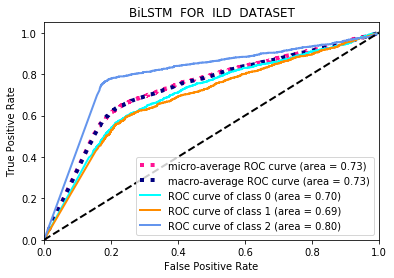

In [25]:
plot_roc(y_testI.cpu().numpy(),y_scoreI.detach().cpu().numpy(),3)

In [26]:

dataset = pd.DataFrame({'fpr':azz['fpr'],'tpr':azz['tpr']})

In [27]:
dataset.to_csv('ild_lstm_roc.csv')